In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [290]:
df = pd.read_csv('train-2.csv')

In [291]:
df.head(5)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0


Here we will give a short explanation of all the columns in the dataframe:

id: Just a unique number for each person.

age: The age of the person.

hypertension: Whether they have high blood pressure (1) or not (0).

heart_disease: Whether they have heart disease (1) or not (0).

avg_glucose_level: Their average blood sugar level.

bmi: Their body mass index (a measure of body fat).

gender_Female/Male/Other: The gender they identify as.

ever_married_No/Yes: Whether they have ever been married or not.

work_type_Govt_job/Never_worked/Private/Self-employed/children: The type of work they do or have done.

Residence_type_Rural/Urban: Whether they live in a rural or urban area.

smoking_status_formerly smoked/never smoked/smokes: Their smoking habits.

stroke: Whether they've had a stroke (1) or not (0).

display data types and missing values in the datafram df

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

In the output above we can see that there are no missing values in the dataframe. However, when we look at the data types, there are a lot of collumns that have booleans as a value. (e.g. booleans can only have 2 values: True and False). In order to apply Machine Learning on this dataset, we have to transform these boolean values into numerical values (e.g. 1 = TRUE, 0 = FALSE). If we have transformed the dataframe into only numerical values, we can apply our EDA and ML models eventually.

In [293]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,36746.393353,41.815312,0.088137,0.043040,103.587081,28.601216,0.015410
std,20906.519131,22.477423,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18763.250000,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,36862.000000,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,54757.500000,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


Drop the ID column


In [294]:

#df = df.drop(['id'], axis=1)
#display(df.head(5))
df_nostroke = df[df['stroke'] == 0]
noWorkStrokes = df_nostroke['work_type_Never_worked'].sum()
display(noWorkStrokes)


141

@todo explenation why we droped never worked strokes

Transform df into only numerical values.

In [295]:
df['age'] = df['age'].astype(int)


# df -> df numerical values


#df_numeric = df.astype(int)

# display 5 first rows of the transformed dataframe.
#df_numeric.head(5)
#df_numeric.describe()

df = df[df['gender_Other'] == 0]


df['gender'] = df.apply(
    lambda row: 0 if row['gender_Female'] else 1 ,
    axis=1
)
df = df.drop(['gender_Female', 'gender_Male', 'gender_Other'], axis=1)

df['ever_married'] = df.apply(
    lambda row: 1 if row['ever_married_Yes'] else 0,
    axis=1
)
df = df.drop(['ever_married_No', 'ever_married_Yes'], axis=1)

df['residence_type'] = df.apply(
    lambda row: 0 if row['Residence_type_Rural'] else 1,
    axis=1
)
df = df.drop(['Residence_type_Rural', 'Residence_type_Urban'], axis=1)

df['work_type_self_employed'] = df.apply(
    lambda row: 1 if row['work_type_Self-employed'] else 0,
   
    axis=1
)
df = df.drop(['work_type_Govt_job', 'work_type_Never_worked','work_type_Private','work_type_Self-employed', 'work_type_children'], axis=1)

display(df.head(5))

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
0,52709,30,0,0,63.60,33.3,False,False,True,0,1,0,0,0
1,72295,75,1,0,215.17,48.0,False,True,False,0,0,1,0,1
2,26451,15,0,0,135.22,19.0,False,True,False,0,1,0,0,0
3,65210,47,0,0,64.89,28.2,False,True,False,0,1,1,1,1
4,69299,49,0,0,222.34,28.8,True,False,False,0,1,1,0,1


In [296]:
df_nostroke = df[df['stroke'] == 1]
df_nostroke.groupby(['gender']).mean()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,ever_married,residence_type,work_type_self_employed
gender,,,,,,,,,,,,,
0,36127.243986,68.725086,0.292096,0.164948,128.032371,29.653265,0.233677,0.515464,0.134021,1.0,0.890034,0.498282,0.319588
1,37807.818584,68.292035,0.261062,0.274336,131.281416,30.174336,0.318584,0.283186,0.221239,1.0,0.898230,0.526549,0.345133


We have removed all reduntant columns @todo explainng

While looking at the data , there are 5 collumns that have continuous numerical values like: 'age', 'hypertension', 'heart_disease', 'avg_glucose_level' and 'bmi'. 

The other columns are only true or false statement. 

In [297]:
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

In [298]:
display(df.head(5))


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
0,52709,30,0,0,63.60,33.3,0,0,1,0,1,0,0,0
1,72295,75,1,0,215.17,48.0,0,1,0,0,0,1,0,1
2,26451,15,0,0,135.22,19.0,0,1,0,0,1,0,0,0
3,65210,47,0,0,64.89,28.2,0,1,0,0,1,1,1,1
4,69299,49,0,0,222.34,28.8,1,0,0,0,1,1,0,1


# Data cleaning

We will now look at the data (the continuous values) to see if all the data is logical and consistent

In [299]:
df_stroke = df[df['stroke'] == 1]
display(df_stroke)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
28,13491,80,0,0,259.63,31.7,0,0,1,1,1,1,0,0
216,3512,70,1,0,89.13,34.2,1,0,0,1,0,1,1,1
231,43424,78,0,0,78.81,19.6,0,0,0,1,0,1,0,0
245,36338,39,1,0,58.09,39.2,0,0,1,1,0,1,0,0
283,23260,67,0,0,89.59,25.3,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33244,50049,72,0,1,141.72,33.0,0,0,0,1,1,1,0,0
33284,5095,59,0,0,79.53,29.9,0,1,0,1,1,1,1,1
33315,4809,80,0,0,109.96,19.9,0,1,0,1,0,1,0,0
33328,39373,82,1,0,196.92,22.2,0,1,0,1,0,1,1,1


In [300]:
df_nostroke = df[df['stroke'] == 1] 
stroke_count_by_gender = df_nostroke.groupby('gender').size()
display(stroke_count_by_gender)

gender
0    291
1    226
dtype: int64

@TODO explanation why formerly smoked has a higer risk according to the data for a stroke? is it true.

Drop unnecessary columns @todo

In [301]:
columns_to_drop = [
     
    'gender',
    'smoking_status_never smoked', 
    'smoking_status_smokes'
]


df = df.drop(columns=columns_to_drop)


print(df.head())

      id  age  hypertension  heart_disease  avg_glucose_level   bmi  \
0  52709   30             0              0              63.60  33.3   
1  72295   75             1              0             215.17  48.0   
2  26451   15             0              0             135.22  19.0   
3  65210   47             0              0              64.89  28.2   
4  69299   49             0              0             222.34  28.8   

   smoking_status_formerly smoked  stroke  ever_married  residence_type  \
0                               0       0             0               0   
1                               0       0             1               0   
2                               0       0             0               0   
3                               0       0             1               1   
4                               1       0             1               0   

   work_type_self_employed  
0                        0  
1                        1  
2                        0  
3     

In [302]:
df_nostroke = df[df['stroke'] == 0]
noWorkStrokes = df_nostroke['gender'].sum()
display(noWorkStrokes)

KeyError: 'gender'

There are a lot of outliers in the columns bmi & avg_glucose_levels. 
According to general medical knowlege. An assumption we could make is that people with an high BMI, average glucose level get more strokes.

To test this theory, we will find out how many people had a stroke in total, how many people with a high BMI got a stroke and how many 
people with high BMI also got a stroke. 

In [207]:
#make 2 df's with stroke and now stroke.

df_stroke = df_subset[df_subset['stroke'] == 1]

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
28,13491,80.0,0,0,259.63,31.7,1
216,3512,70.0,1,0,89.13,34.2,1
231,43424,78.0,0,0,78.81,19.6,1
245,36338,39.0,1,0,58.09,39.2,1
283,23260,67.0,0,0,89.59,25.3,1
...,...,...,...,...,...,...,...
33244,50049,72.0,0,1,141.72,33.0,1
33284,5095,59.0,0,0,79.53,29.9,1
33315,4809,80.0,0,0,109.96,19.9,1
33328,39373,82.0,1,0,196.92,22.2,1


median glucose level of stroke patients 104.12
median glucose level of all patients 91.32
Median age of all patients 43.0
median age of stroke patients 72.0


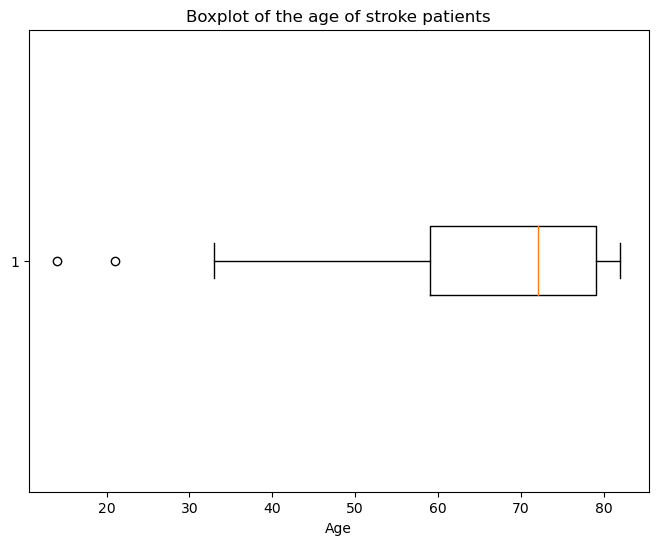

In [208]:
display(df_stroke)

print("median glucose level of stroke patients" + str(" ") + str(df_stroke['avg_glucose_level'].median()))
print("median glucose level of all patients" + str(" ") + str(df['avg_glucose_level'].median()))

print("Median age of all patients" + str(" ") + str(df['age'].median()))
print("median age of stroke patients" + str(" ") + str(df_stroke['age'].median()))


plt.figure(figsize=(8, 6))
plt.boxplot(df_stroke["age"], vert=False)
plt.title("Boxplot of the age of stroke patients")
plt.xlabel("Age")
plt.show()

median glucose level of stroke patients 104.12
median glucose level of all patients 91.32
Median age of all patients 43.0
median age of stroke patients 72.0

In [209]:
df_stroke_and_overweight = df_stroke[df_stroke['bmi'] >= 25]
display(df_stroke_and_overweight) 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
28,13491,80.0,0,0,259.63,31.7,1
216,3512,70.0,1,0,89.13,34.2,1
245,36338,39.0,1,0,58.09,39.2,1
283,23260,67.0,0,0,89.59,25.3,1
289,11961,57.0,1,0,196.30,38.6,1
...,...,...,...,...,...,...,...
33147,20426,78.0,1,0,203.87,45.7,1
33202,20067,74.0,0,0,101.67,27.9,1
33244,50049,72.0,0,1,141.72,33.0,1
33284,5095,59.0,0,0,79.53,29.9,1


According to the WHO organization people with a bmi score over 25 are overweight. 
In the dataset there are 517 cases of people who had a stroke. 

When filtering the people who had a stroke and a bmi over 25, which means that they are overweight. We see that 414 people suffered from a stoke.
This strongly indicates that a majority of the patient who are overweight suffered a stroke. 

In conclusion this means that approx. 80% of overweight people also suffered from a stroke according to this dataset.

In [210]:
df_stroke_and_hypertension = df_stroke[df_stroke['hypertension'] == 1]
display(df_stroke_and_hypertension)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
216,3512,70.0,1,0,89.13,34.2,1
245,36338,39.0,1,0,58.09,39.2,1
289,11961,57.0,1,0,196.30,38.6,1
616,6660,67.0,1,0,88.79,27.4,1
783,2326,67.0,1,0,179.12,28.1,1
...,...,...,...,...,...,...,...
32941,53156,73.0,1,0,77.72,31.4,1
32947,36575,81.0,1,1,65.12,27.4,1
33137,34567,81.0,1,0,74.02,25.0,1
33147,20426,78.0,1,0,203.87,45.7,1


In [211]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model with balanced class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Check the coefficient again
print(f'Coefficient for BMI (with class weighting): {model.coef_}')

NameError: name 'X' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model with balanced class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Check the coefficient again
print(f'Coefficient for BMI (with class weighting): {model.coef_}')